In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import optimizers, losses, callbacks
from keras.models import Sequential

In [2]:
data_dir= 'C://Users//vikas//OneDrive//Desktop//signatur//data//'

In [3]:
batch_size=3
img_height= 180
img_width= 180

In [4]:
train_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=12,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18 files belonging to 8 classes.
Using 15 files for training.


In [5]:
val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=12,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18 files belonging to 8 classes.
Using 3 files for validation.


In [6]:
class_names= train_ds.class_names
class_names

['akoene', 'andernu', 'bname', 'evd', 'kin', 'marry', 'promod', 'srross']

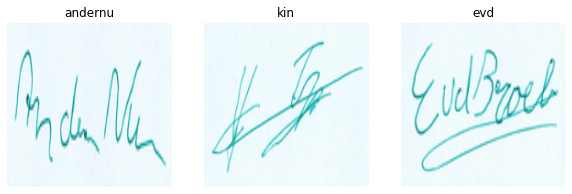

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(3, 180, 180, 3)
(3,)


In [9]:
# configuring the dataset for performance
import tensorflow as tf
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
# standardizing the data
from tensorflow.keras import layers
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [11]:
num_classes = 8
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [13]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [14]:
from keras.callbacks import EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

In [15]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
5/5 [==============================] - 4s 275ms/step - loss: 2.8839 - accuracy: 0.0000e+00 - val_loss: 2.4631 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 1s 106ms/step - loss: 2.0764 - accuracy: 0.1333 - val_loss: 2.1735 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 1s 114ms/step - loss: 2.0606 - accuracy: 0.2000 - val_loss: 2.2755 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 1s 114ms/step - loss: 2.0537 - accuracy: 0.2000 - val_loss: 2.4926 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 1s 112ms/step - loss: 1.9718 - accuracy: 0.2000 - val_loss: 2.6096 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 1s 114ms/step - loss: 1.9399 - accuracy: 0.2000 - val_loss: 2.9197 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] - 1s 119ms/step - loss: 1.8457 - accuracy: 0.2000 - val_loss: 2.6477 - val_accuracy:

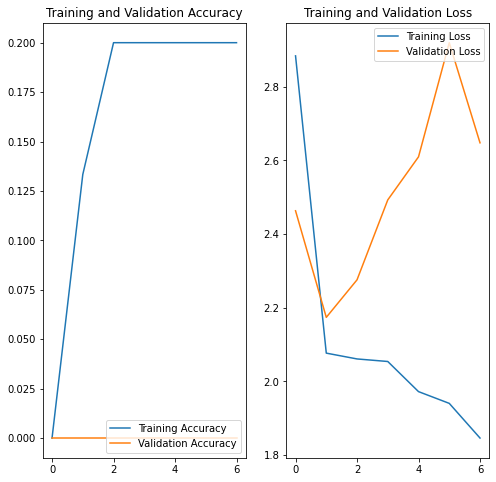

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
data_augmentation = Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

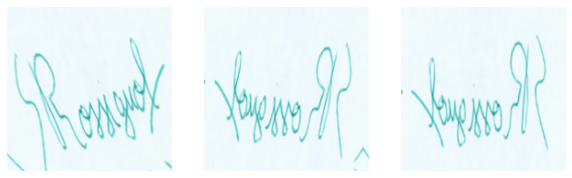

In [18]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(3):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [19]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [22]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
# model.save("signature_model.h5") # After create model you can save and load your model

Epoch 1/15
5/5 [==============================] - 5s 200ms/step - loss: 4.1280 - accuracy: 0.0000e+00 - val_loss: 1.9128 - val_accuracy: 0.3333
Epoch 2/15
5/5 [==============================] - 1s 135ms/step - loss: 2.0645 - accuracy: 0.2667 - val_loss: 2.2492 - val_accuracy: 0.0000e+00
Epoch 3/15
5/5 [==============================] - 1s 156ms/step - loss: 2.0490 - accuracy: 0.2000 - val_loss: 2.5263 - val_accuracy: 0.0000e+00
Epoch 4/15
5/5 [==============================] - 1s 160ms/step - loss: 2.0109 - accuracy: 0.2000 - val_loss: 2.6113 - val_accuracy: 0.0000e+00
Epoch 5/15
5/5 [==============================] - 1s 172ms/step - loss: 2.1227 - accuracy: 0.0667 - val_loss: 2.5370 - val_accuracy: 0.0000e+00
Epoch 6/15
5/5 [==============================] - 1s 150ms/step - loss: 2.0398 - accuracy: 0.1333 - val_loss: 2.5552 - val_accuracy: 0.0000e+00
Epoch 7/15
5/5 [==============================] - 1s 145ms/step - loss: 1.9950 - accuracy: 0.2000 - val_loss: 2.6310 - val_accuracy: 0.0

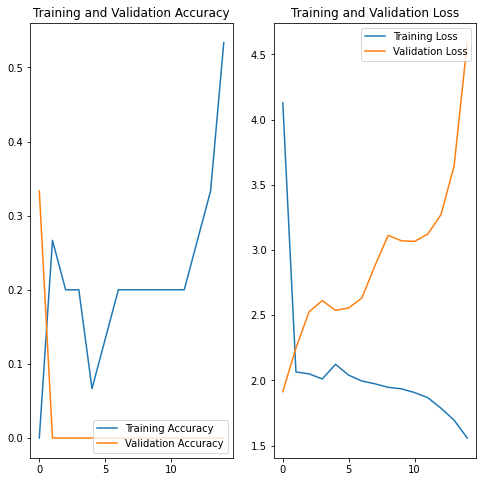

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
tesing_img = "C://Users//vikas//OneDrive//Desktop//signatur//for_testing.png"
# you can add new image path here and test your model

img = tf.keras.preprocessing.image.load_img(
    tesing_img, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 304ms/step
This image most likely belongs to srross with a 47.73 percent confidence.
